Supervised learning classification checkpoint, on the 'Systemic Crisis, Banking Crisis, inflation Crisis In Africa' dataset provided by Kaggle.

Dataset description : This dataset focuses on the Banking, Debt, Financial, Inflation and Systemic Crises that occurred, from 1860 to 2014, in 13 African countries, including: Algeria, Angola, Central African Republic, Ivory Coast, Egypt, Kenya, Mauritius, Morocco, Nigeria, South Africa, Tunisia, Zambia and Zimbabwe. 

# The ML model objective is to predict the likelihood of a Systemic crisis emergence given a set of indicators like the annual inflation rates etc..

In [56]:
# key libraries
import pandas as pd
import numpy as np
from ydata_profiling import ProfileReport
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [41]:
# loading the dataset
df = pd.read_csv('African_crises_dataset.csv')

In [10]:
# basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   country_number                   1059 non-null   int64  
 1   country_code                     1059 non-null   object 
 2   country                          1059 non-null   object 
 3   year                             1059 non-null   int64  
 4   systemic_crisis                  1059 non-null   int64  
 5   exch_usd                         1059 non-null   float64
 6   domestic_debt_in_default         1059 non-null   int64  
 7   sovereign_external_debt_default  1059 non-null   int64  
 8   gdp_weighted_default             1059 non-null   float64
 9   inflation_annual_cpi             1059 non-null   float64
 10  independence                     1059 non-null   int64  
 11  currency_crises                  1059 non-null   int64  
 12  inflation_crises    

In [11]:
# inspecting first few rows
df.head()

,country_number,country_code,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
0,1,DZA,Algeria,1870,1,0.052264,0,0,0.0,3.441456,0,0,0,crisis
1,1,DZA,Algeria,1871,0,0.052798,0,0,0.0,14.149140,0,0,0,no_crisis
2,1,DZA,Algeria,1872,0,0.052274,0,0,0.0,-3.718593,0,0,0,no_crisis
3,1,DZA,Algeria,1873,0,0.051680,0,0,0.0,11.203897,0,0,0,no_crisis
4,1,DZA,Algeria,1874,0,0.051308,0,0,0.0,-3.848561,0,0,0,no_crisis


In [16]:
# summary stats
df.describe()

,country_number,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises
count,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1.059000e+03,1059.000000,1059.000000,1059.000000
mean,35.613787,1967.767705,0.077432,43.140831,0.039660,0.152975,0.006402,2.084889e+04,0.776204,0.132200,0.129367
std,23.692402,33.530632,0.267401,111.475380,0.195251,0.360133,0.043572,6.757274e+05,0.416984,0.349847,0.335765
min,1.000000,1860.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.850214e+01,0.000000,0.000000,0.000000
25%,15.000000,1951.000000,0.000000,0.195350,0.000000,0.000000,0.000000,2.086162e+00,1.000000,0.000000,0.000000
50%,38.000000,1973.000000,0.000000,0.868400,0.000000,0.000000,0.000000,5.762330e+00,1.000000,0.000000,0.000000
75%,56.000000,1994.000000,0.000000,8.462750,0.000000,0.000000,0.000000,1.164405e+01,1.000000,0.000000,0.000000
max,70.000000,2014.000000,1.000000,744.306139,1.000000,1.000000,0.400000,2.198970e+07,1.000000,2.000000,1.000000


In [14]:
# Generate the profiling report using ydata-profiling for insights
profile = ProfileReport(df, title="YData Profiling Report", explorative=True)

In [15]:
# Display the report in Jupyter Notebook 
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [17]:
# checking and handling missing values
df.isnull().sum()

country_number                     0
country_code                       0
country                            0
year                               0
systemic_crisis                    0
exch_usd                           0
domestic_debt_in_default           0
sovereign_external_debt_default    0
gdp_weighted_default               0
inflation_annual_cpi               0
independence                       0
currency_crises                    0
inflation_crises                   0
banking_crisis                     0
dtype: int64

In [18]:
# checking and handling duplicates
df.duplicated().sum()

0

In [24]:
# outlier detection

# Define a function to detect outliers based on IQR
def detect_outliers_iqr(df):
    outliers = pd.DataFrame()
    numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
    
    for col in numerical_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Find rows where the value is outside the IQR bounds
        outliers_in_col = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outliers = pd.concat([outliers, outliers_in_col])
    
    return outliers

# Apply the IQR method to detect outliers
outliers_iqr = detect_outliers_iqr(df)
print(f'Number of outliers found: {outliers_iqr.shape[0]}')
outliers_iqr.head()

Number of outliers found: 1190


,country_number,country_code,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
0,1,DZA,Algeria,1870,1,0.052264,0,0,0.0,3.441456,0,0,0,crisis
1,1,DZA,Algeria,1871,0,0.052798,0,0,0.0,14.149140,0,0,0,no_crisis
2,1,DZA,Algeria,1872,0,0.052274,0,0,0.0,-3.718593,0,0,0,no_crisis
3,1,DZA,Algeria,1873,0,0.051680,0,0,0.0,11.203897,0,0,0,no_crisis
4,1,DZA,Algeria,1874,0,0.051308,0,0,0.0,-3.848561,0,0,0,no_crisis


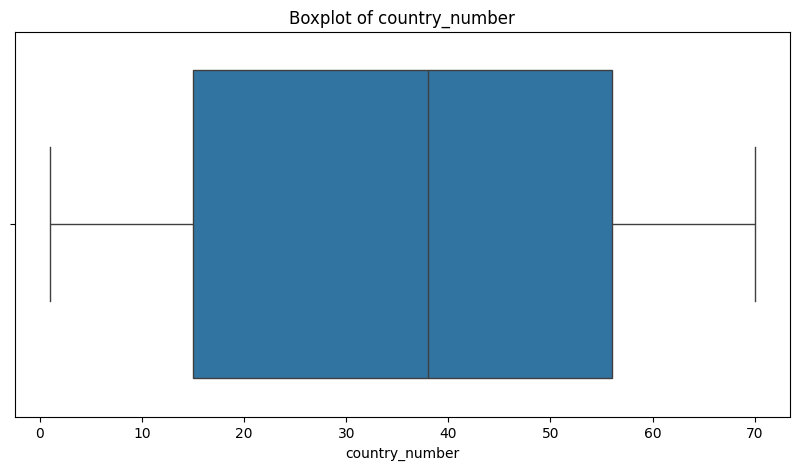

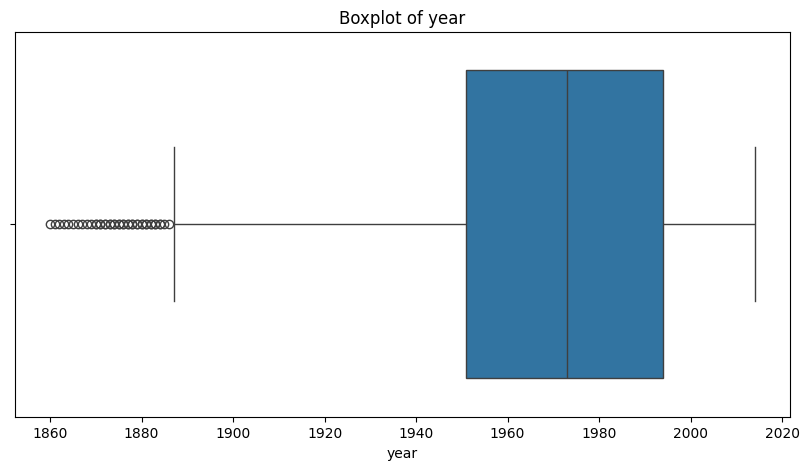

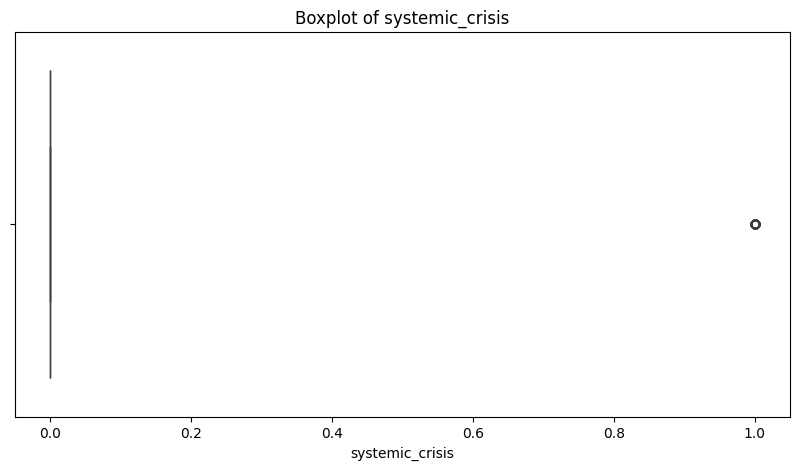

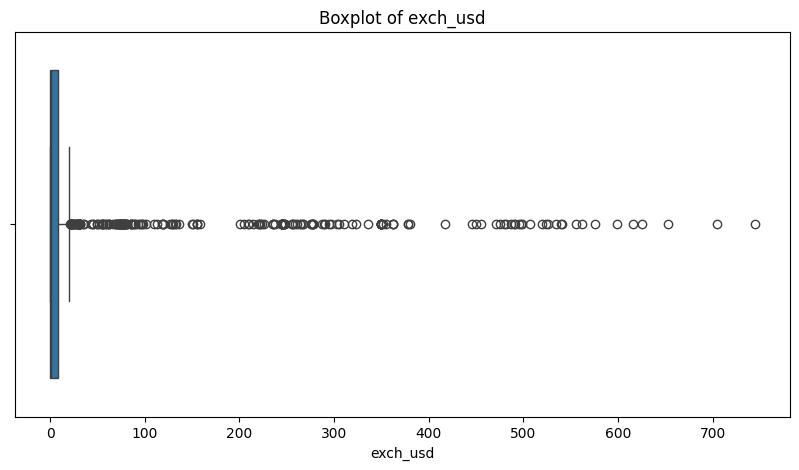

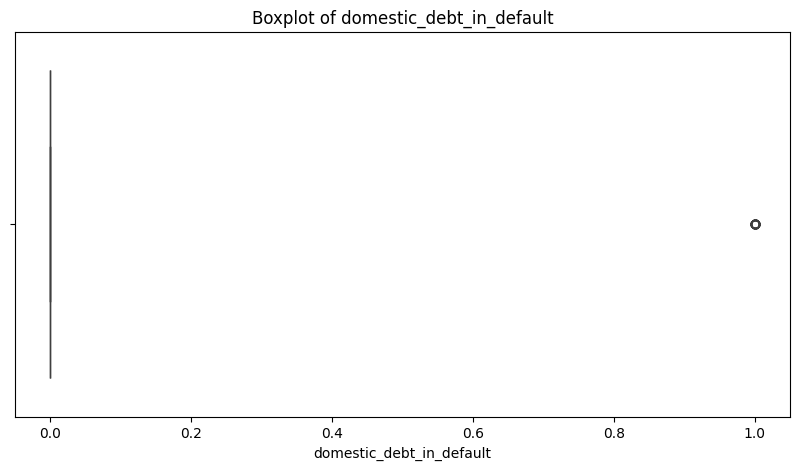

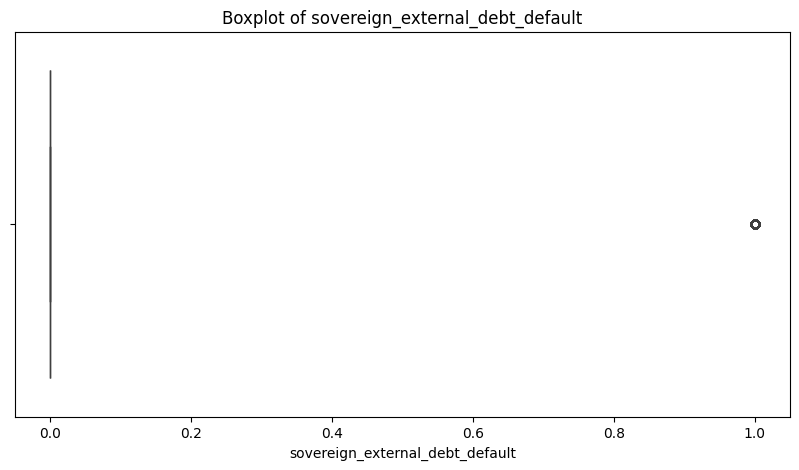

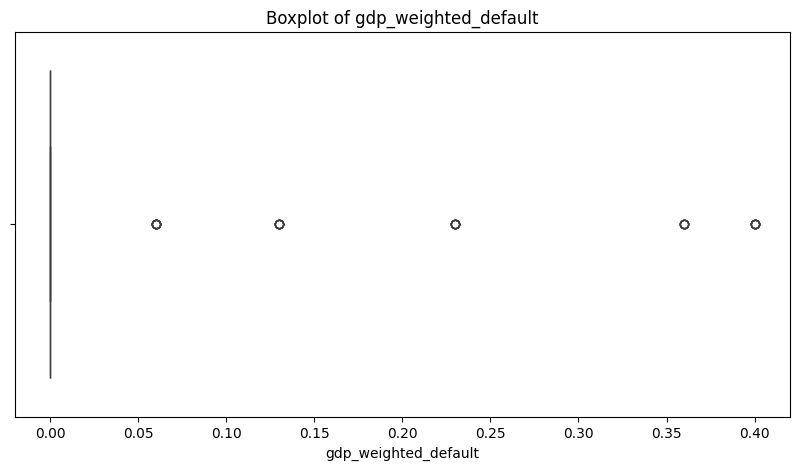

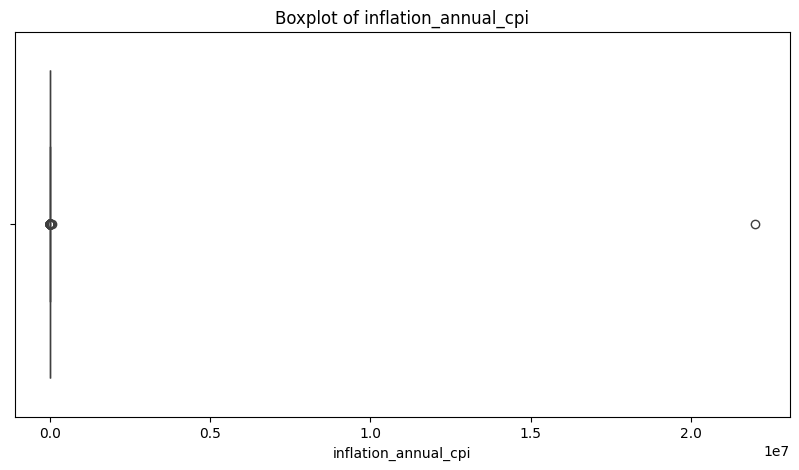

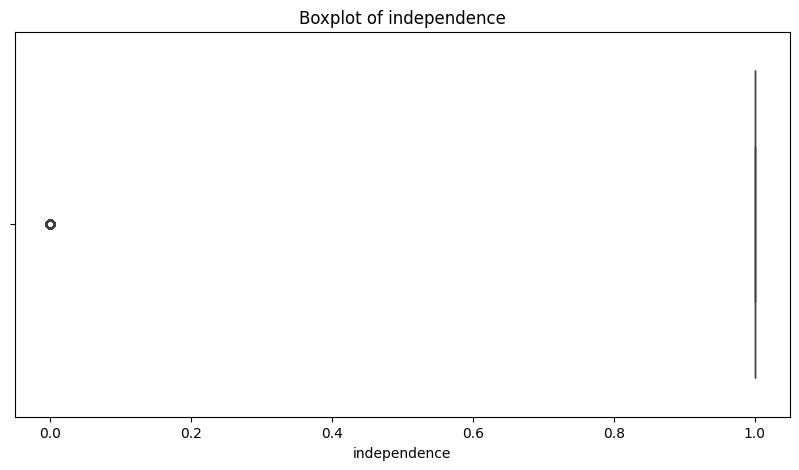

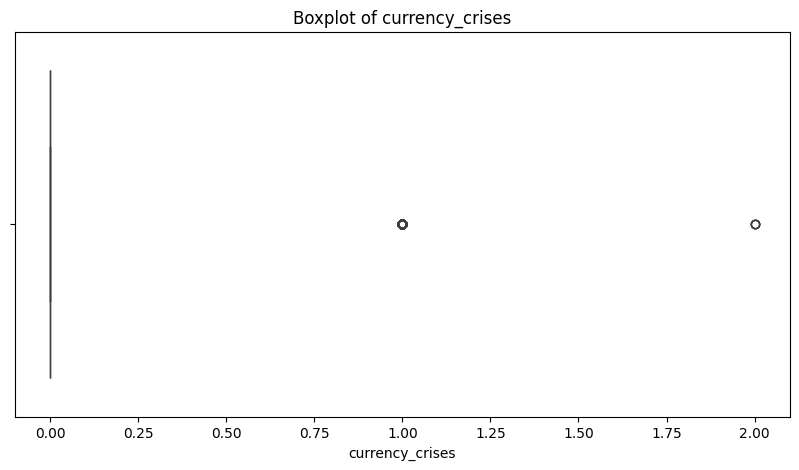

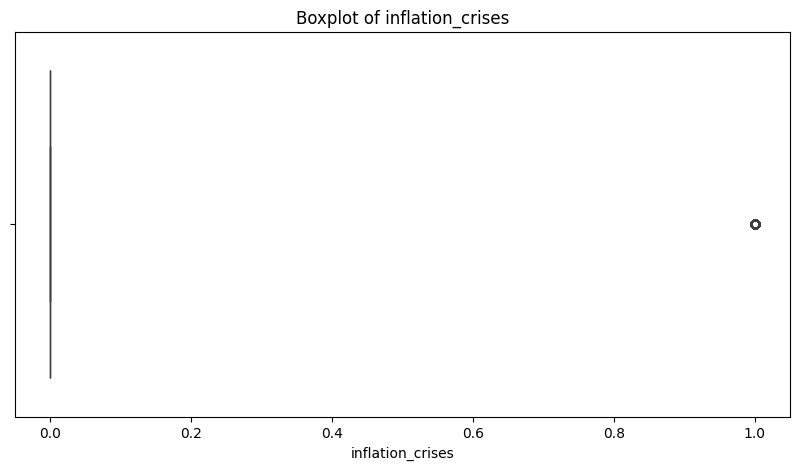

In [22]:
# Visualize outliers in all numerical columns using boxplots
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Create a boxplot for each numerical column
for col in numerical_cols:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

In [27]:
# handling the outliers through capping

# Function to cap outliers in numerical cols
def cap_outliers(df):
    numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
    
    for col in numerical_cols:
        # Calculating the 1st and 99th percentiles
        lower_cap = df[col].quantile(0.01)
        upper_cap = df[col].quantile(0.99)
        
        # Apply capping
        df[col] = np.where(df[col] < lower_cap, lower_cap, 
                           np.where(df[col] > upper_cap, upper_cap, df[col]))
    
    return df

# Applying the capping function
df_capped = cap_outliers(df)

In [28]:
# Confirming if outliers have been capped
print(df_capped.describe())

       country_number         year  systemic_crisis     exch_usd  \
count     1059.000000  1059.000000      1059.000000  1059.000000   
mean        35.613787  1967.813617         0.077432    42.374542   
std         23.692402    33.364926         0.267401   107.560586   
min          1.000000  1870.000000         0.000000     0.000000   
25%         15.000000  1951.000000         0.000000     0.195350   
50%         38.000000  1973.000000         0.000000     0.868400   
75%         56.000000  1994.000000         0.000000     8.462750   
max         70.000000  2013.420000         1.000000   536.867781   

       domestic_debt_in_default  sovereign_external_debt_default  \
count               1059.000000                      1059.000000   
mean                   0.039660                         0.152975   
std                    0.195251                         0.360133   
min                    0.000000                         0.000000   
25%                    0.000000                

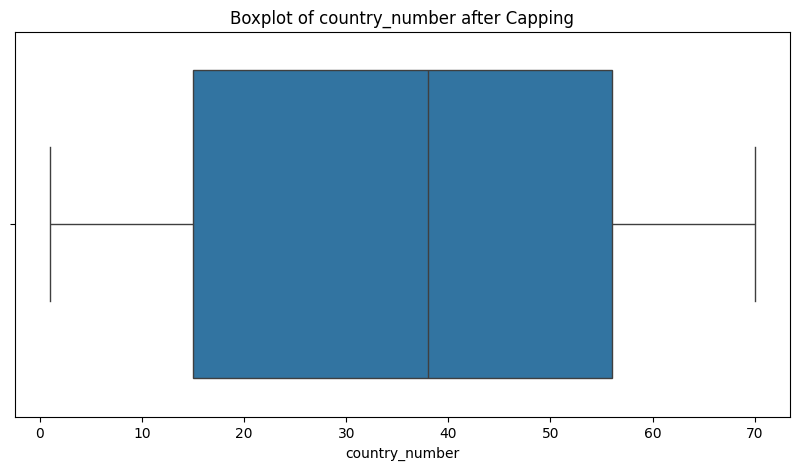

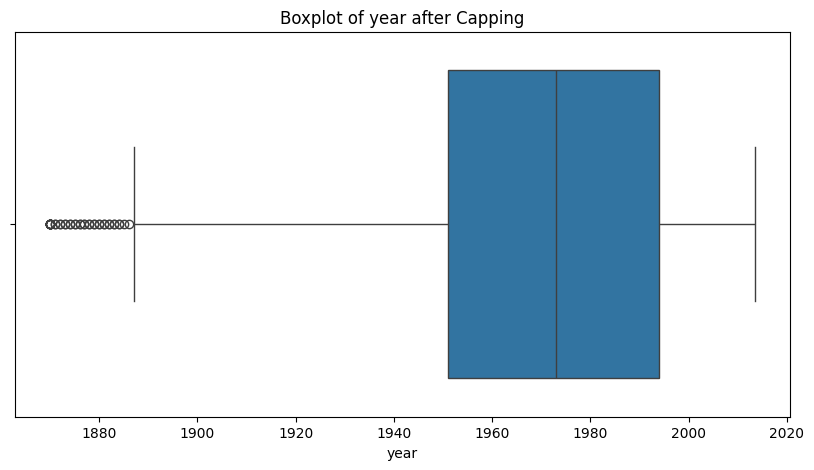

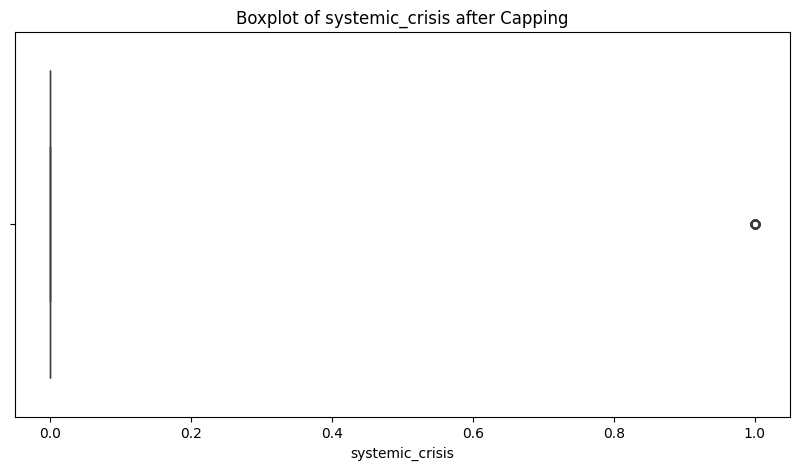

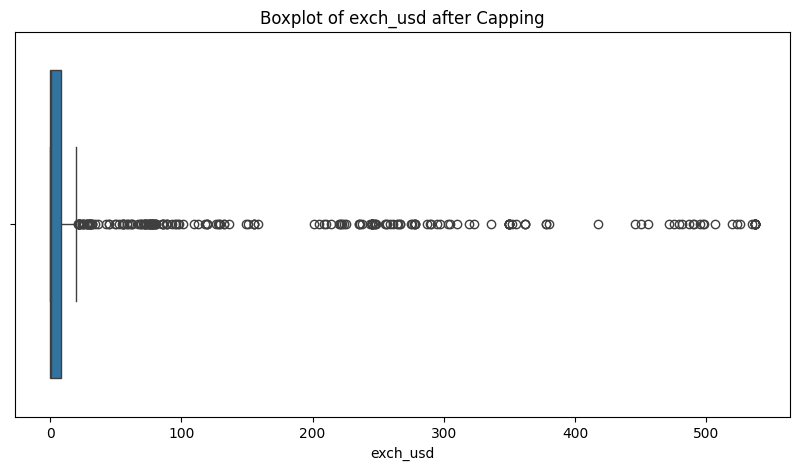

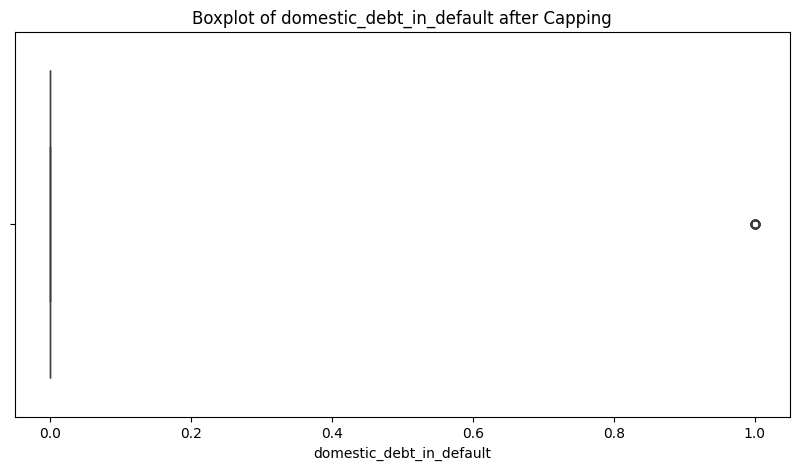

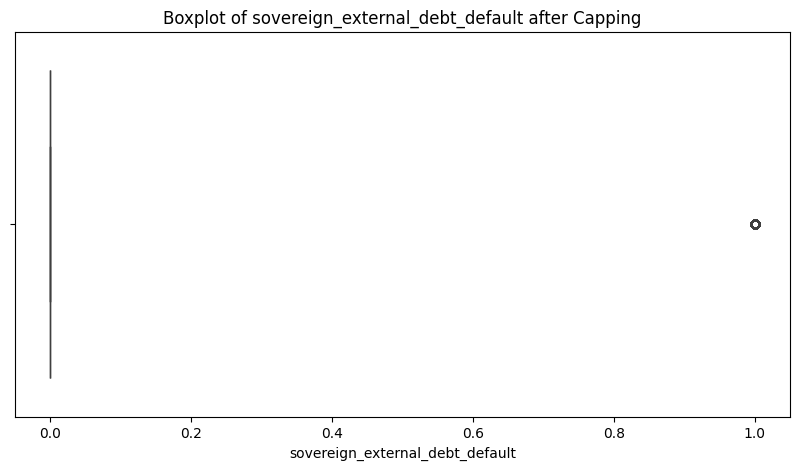

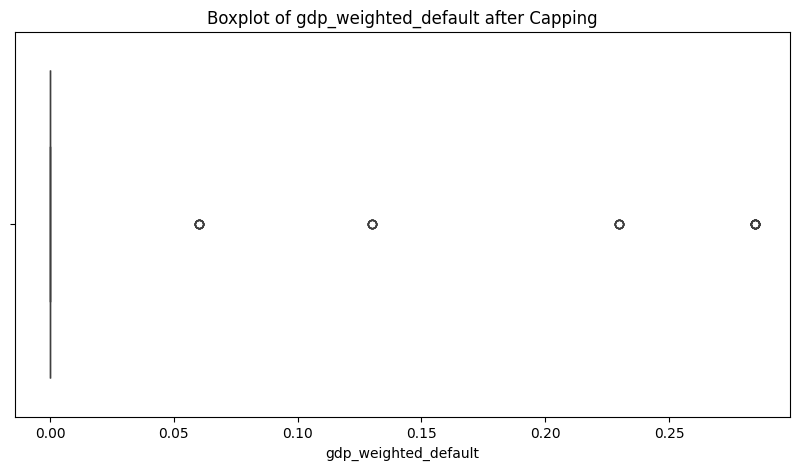

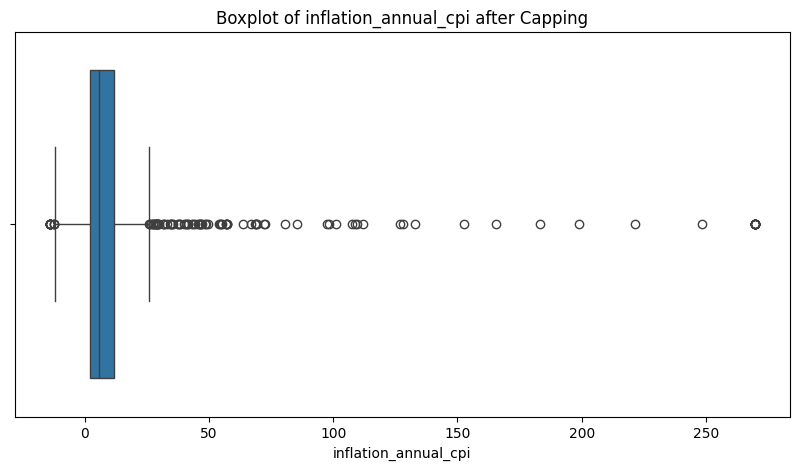

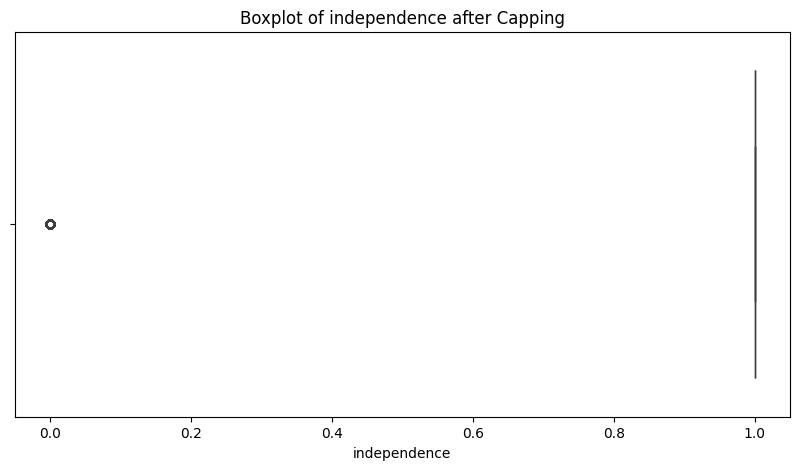

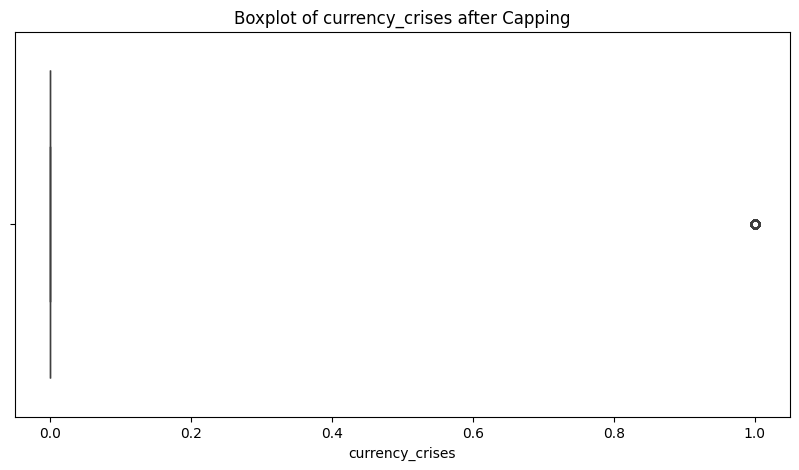

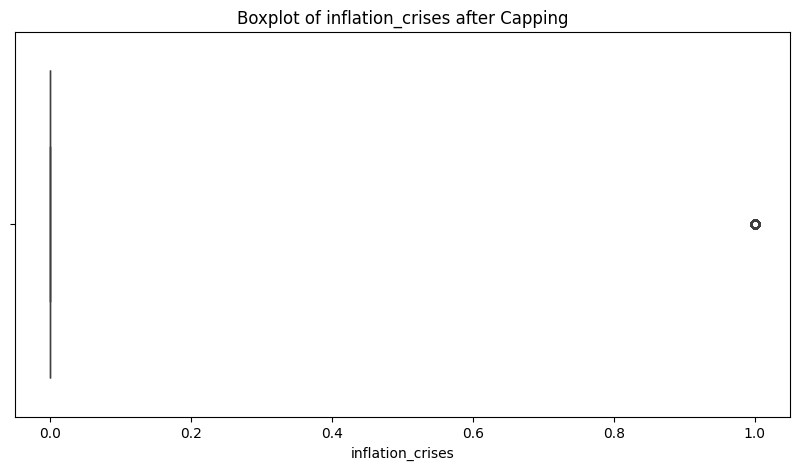

In [29]:
# Boxplots for checking the distribution after capping
for col in numerical_cols:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=df_capped[col])
    plt.title(f'Boxplot of {col} after Capping')
    plt.show()

In [43]:
# Re-adding the country column to my current df since I had dropped it by mistake
df['country'] = df['country']

In [44]:
df.head()

,country_number,country_code,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
0,1,DZA,Algeria,1870,1,0.052264,0,0,0.0,3.441456,0,0,0,crisis
1,1,DZA,Algeria,1871,0,0.052798,0,0,0.0,14.149140,0,0,0,no_crisis
2,1,DZA,Algeria,1872,0,0.052274,0,0,0.0,-3.718593,0,0,0,no_crisis
3,1,DZA,Algeria,1873,0,0.051680,0,0,0.0,11.203897,0,0,0,no_crisis
4,1,DZA,Algeria,1874,0,0.051308,0,0,0.0,-3.848561,0,0,0,no_crisis


In [47]:
df.columns

Index(['country_number', 'country', 'year', 'systemic_crisis', 'exch_usd',
       'domestic_debt_in_default', 'sovereign_external_debt_default',
       'gdp_weighted_default', 'inflation_annual_cpi', 'independence',
       'currency_crises', 'inflation_crises', 'banking_crisis'],
      dtype='object')

In [45]:
# Dropping country code column
df = df.drop(['country_code'], axis=1)

In [57]:
# Initialize the Label Encoder
le = LabelEncoder()

In [58]:
# Fit and transform the target variable
y = le.fit_transform(y)

In [59]:
# confirming the updated dataset
df.head()

,country_number,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis_no_crisis
0,1,Algeria,1870,1,0.052264,0,0,0.0,3.441456,0,0,0,False
1,1,Algeria,1871,0,0.052798,0,0,0.0,14.149140,0,0,0,True
2,1,Algeria,1872,0,0.052274,0,0,0.0,-3.718593,0,0,0,True
3,1,Algeria,1873,0,0.051680,0,0,0.0,11.203897,0,0,0,True
4,1,Algeria,1874,0,0.051308,0,0,0.0,-3.848561,0,0,0,True


# model creation

In [60]:
# target variable and features selection

X = df[['year', 'exch_usd', 'domestic_debt_in_default', 'sovereign_external_debt_default',
         'gdp_weighted_default', 'inflation_annual_cpi', 'independence',
         'currency_crises', 'inflation_crises']] # features

y = df['systemic_crisis'] # target

In [61]:
# training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [62]:
# Train the model
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier()

In [64]:
# predictions on the test set
y_pred = clf.predict(X_test)

In [65]:
# model performance evaluation
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))

Accuracy: 0.9245283018867925
Confusion Matrix:
 [[190   5]
 [ 11   6]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96       195
           1       0.55      0.35      0.43        17

    accuracy                           0.92       212
   macro avg       0.75      0.66      0.69       212
weighted avg       0.91      0.92      0.92       212



# model improvement and summary notes
1. Model performs exceptionally well in predicting the "no crisis" class but struggles significantly with the "crisis" class.
2. My high accuracy is somewhat misleading due to the class imbalance, with the model being biased toward the majority class.
3. I may need to explore methods to improve performance on the minority class, such as:
   a. Resampling techniques.
   b. Using different algorithms.
   c. Implementing cost-sensitive learning(penalize the misclassification of the minority class more than the majority class.)